## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

%matplotlib inline

# set pandas settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 2. Read data

In [2]:
path = "data/playlist_revision_v05.txt"
playlist_df = pd.read_csv(path, delimiter='\t')

In [3]:
# Add our metric column 
# playlist_df['metric'] = round(playlist_df.monthly_stream30s / playlist_df.mau, ndigits=2)
playlist_df.head()

,playlist_uri,owner,streams,stream30s,dau,wau,mau,mau_previous_month,mau_both_months,users,skippers,owner_country,n_tracks,n_local_tracks,n_artists,n_albums,monthly_stream30s,monthly_owner_stream30s,tokens,genre_1,genre_2,genre_3,mood_1,mood_2,mood_3,premium_mau_previous_month,premium_mau,mau_premium_ratio,mau_previous_month_premium_ratio
0,spotify:user:25d04611ade7d93b279098dd90c2dcde:...,25d04611ade7d93b279098dd90c2dcde,0,0,0,2,3,1,1,3,0,US,44,18,20,19,64,6,"[""eclectronic""]",Electronica,Alternative,Dance & House,Sensual,Excited,Brooding,1.0,1.0,NaN,NaN
1,spotify:user:a99297eb43f794a785a32258cc5320e7:...,a99297eb43f794a785a32258cc5320e7,0,0,0,0,2,0,0,2,0,US,249,0,79,81,31,26,"[""party"", ""woodside""]",Pop,Latin,Rap,Excited,Energizing,Defiant,0.0,2.0,NaN,NaN
2,spotify:user:294f08499afea11c56ddf92ab3ce6f56:...,294f08499afea11c56ddf92ab3ce6f56,5,5,1,3,5,3,1,9,0,US,313,0,271,257,682,617,"[""five"", ""hours""]",Alternative,Electronica,Pop,Excited,Aggressive,Urgent,2.0,3.0,NaN,NaN
3,spotify:user:acfea3b5d4a4b8fefa6c8605738788e8:...,acfea3b5d4a4b8fefa6c8605738788e8,30,30,1,1,2,2,1,3,0,US,109,13,90,94,49,5,"[""summertime""]",Alternative,Rap,Pop,Defiant,Excited,Energizing,2.0,2.0,NaN,NaN
4,spotify:user:46f8f6c970f7a68ec67fe69514e9b182:...,46f8f6c970f7a68ec67fe69514e9b182,0,0,0,1,2,2,1,6,0,US,414,0,284,24,15,9,"[""latino"", ""greatest"", ""hits""]",Pop,R&B,Blues,Energizing,Lively,Fiery,2.0,1.0,NaN,NaN


In [4]:
print(f"Playlist datafrmae contains {playlist_df.shape[0]} rows and {playlist_df.shape[1]} columns \n")

playlist_df.describe()

Playlist datafrmae contains 427276 rows and 29 columns 



,streams,stream30s,dau,wau,mau,mau_previous_month,mau_both_months,users,skippers,n_tracks,n_local_tracks,n_artists,n_albums,monthly_stream30s,monthly_owner_stream30s,premium_mau_previous_month,premium_mau,mau_premium_ratio,mau_previous_month_premium_ratio
count,4.272760e+05,4.272760e+05,427276.000000,427276.000000,4.272760e+05,4.272760e+05,427276.000000,4.272760e+05,427276.000000,427276.000000,427276.000000,427276.000000,427276.000000,4.272760e+05,427276.000000,427275.000000,4.272750e+05,1.0,1.00
mean,7.212229e+01,4.449239e+01,4.299673,21.192740,6.440589e+01,5.669391e+01,12.560825,1.454201e+02,2.734268,194.724101,2.979077,81.027820,85.269519,1.250349e+03,116.974953,37.095646,3.518560e+01,0.5,0.75
std,6.316762e+03,3.673820e+03,349.535428,1574.886035,4.619766e+03,3.741111e+03,1208.712012,9.042585e+03,199.744978,575.081233,39.460309,126.723869,131.827612,1.035363e+05,256.382438,2359.007039,2.474932e+03,NaN,NaN
min,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,1.000000e+00,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000e+00,0.000000,0.000000,0.000000e+00,0.5,0.75
25%,0.000000e+00,0.000000e+00,0.000000,1.000000,2.000000e+00,1.000000e+00,1.000000,2.000000e+00,0.000000,34.000000,0.000000,16.000000,17.000000,3.200000e+01,7.000000,0.000000,1.000000e+00,0.5,0.75
50%,1.000000e+00,0.000000e+00,0.000000,1.000000,2.000000e+00,2.000000e+00,1.000000,3.000000e+00,0.000000,80.000000,0.000000,44.000000,46.000000,8.400000e+01,32.000000,1.000000,2.000000e+00,0.5,0.75
75%,1.000000e+01,6.000000e+00,1.000000,2.000000,3.000000e+00,3.000000e+00,2.000000,7.000000e+00,0.000000,185.000000,0.000000,98.000000,103.000000,2.160000e+02,110.000000,3.000000,2.000000e+00,0.5,0.75
max,2.629715e+06,1.513237e+06,152929.000000,669966.000000,1.944150e+06,1.478684e+06,578391.000000,3.455406e+06,86162.000000,79984.000000,9117.000000,5226.000000,6397.000000,4.249733e+07,25904.000000,987995.000000,1.012068e+06,0.5,0.75


In [5]:
# count nulls
playlist_df.isnull().sum()

playlist_uri                             0
owner                                    0
streams                                  0
stream30s                                0
dau                                      0
wau                                      0
mau                                      0
mau_previous_month                       0
mau_both_months                          0
users                                    0
skippers                                 0
owner_country                            0
n_tracks                                 0
n_local_tracks                           0
n_artists                                0
n_albums                                 0
monthly_stream30s                        0
monthly_owner_stream30s                  0
tokens                                   0
genre_1                                  0
genre_2                                  0
genre_3                                  0
mood_1                                   0
mood_2     

In [6]:
# check for duplicates
playlist_df.duplicated().value_counts()

False    417484
True       9792
dtype: int64

In [7]:
playlist_df.sort_values(by = 'mau', ascending=False).head()

,playlist_uri,owner,streams,stream30s,dau,wau,mau,mau_previous_month,mau_both_months,users,skippers,owner_country,n_tracks,n_local_tracks,n_artists,n_albums,monthly_stream30s,monthly_owner_stream30s,tokens,genre_1,genre_2,genre_3,mood_1,mood_2,mood_3,premium_mau_previous_month,premium_mau,mau_premium_ratio,mau_previous_month_premium_ratio
29613,spotify:user:spotify:playlist:0b971e1f69c10c51...,spotify,2527075,1461324,152929,669966,1944150,1478684,578391,3455406,86162,US,51,0,51,51,42497334,22,"[""top"", ""hits""]",Pop,Latin,Alternative,Excited,Cool,Brooding,987995.0,1012068.0,NaN,NaN
327185,spotify:user:spotify:playlist:068087b9f1c51330...,spotify,2629715,1513237,122005,514627,1453097,970905,364140,2448881,56707,US,100,0,93,86,40722305,0,"[""top"", ""tracks"", ""currently"", ""spotify""]",Pop,Alternative,Indie Rock,Excited,Defiant,Energizing,488724.0,783228.0,NaN,NaN
382090,spotify:user:spotify:playlist:b48561bcda41d3f8...,spotify,735281,348391,43498,219817,688999,365968,109688,1233952,34145,US,100,0,100,99,9879201,0,"[""top"", ""pop"", ""tracks"", ""spotify""]",Pop,Latin,Rap,Excited,Defiant,Empowering,232802.0,412765.0,NaN,NaN
388979,spotify:user:spotify:playlist:584d154872033557...,spotify,505876,245377,33152,121173,430129,339921,79443,973788,23846,US,43,0,41,42,5567649,44,"[""teen"", ""party""]",Pop,Latin,Rap,Excited,Yearning,Urgent,228553.0,230371.0,NaN,NaN
39238,spotify:user:spotify:playlist:7f4138fba14ef97a...,spotify,137529,69313,10380,143516,352464,395305,101214,910599,7959,US,67,0,62,64,5230998,34,"[""new"", ""music"", ""tuesday""]",Indie Rock,Dance & House,Alternative,Sensual,Yearning,Excited,255070.0,189662.0,NaN,NaN


<b> Summary </b>

- From the description of the dataframe we can find very large values for streams, dau, wau, etc. Interestingly, they are of the owner type SOPTIFY. As the values are really high we want to analyze the data for SPOTIFY owned and user owed differently. 

- The dataset contains 9792 duplicates and needs to be removed.

- Playlist datafrmae contains 427276 rows and 29 columns

- Only columns containing NULLS are mau_premium_ratio, mau_previous_month_premium_ratio (427275)  and  premium_mau_previous_month, premium_mau (1). The NULLS can be calculated again. So we don't need to remove any rows. We can calculate and put the values in place of NULLS.

## 3. Data Cleaning

In [8]:
# Filling in the nulls of premium_mau_previous_month and premium_mau
playlist_df.iloc[20472,26] = \
    playlist_df.iloc[20472,27] * \
    playlist_df.iloc[20472,6]

playlist_df.iloc[20472,25] = \
    playlist_df.iloc[20472,28] * \
    playlist_df.iloc[20472,7]

In [9]:
# filling the NULL values of mau_premium_ratio and mau_previous_month_premium_ratio
playlist_df['mau_premium_ratio'] = round(playlist_df.premium_mau / playlist_df.mau, ndigits=2)

playlist_df['mau_previous_month_premium_ratio'] = \
    round(playlist_df.premium_mau_previous_month / playlist_df.mau_previous_month, 2)

In [10]:
# drop the duplicate records

playlist_df = playlist_df.drop_duplicates()

In [11]:
playlist_df.isnull().sum()

playlist_uri                            0
owner                                   0
streams                                 0
stream30s                               0
dau                                     0
wau                                     0
mau                                     0
mau_previous_month                      0
mau_both_months                         0
users                                   0
skippers                                0
owner_country                           0
n_tracks                                0
n_local_tracks                          0
n_artists                               0
n_albums                                0
monthly_stream30s                       0
monthly_owner_stream30s                 0
tokens                                  0
genre_1                                 0
genre_2                                 0
genre_3                                 0
mood_1                                  0
mood_2                            

In [12]:
# select the columns to keep

columns_to_keep = ["playlist_uri",
                   "owner",
                   "mau",
                   "skippers",
                   "n_tracks",
                   "n_local_tracks",
                   "n_artists",
                   "n_albums",
                   "monthly_stream30s",
                   "monthly_owner_stream30s",
                   "tokens",
                   "genre_1",
                   "genre_2",
                   "genre_3",
                   "mood_1",
                   "mood_2",
                   "mood_3",
                   "premium_mau",
                   "mau_premium_ratio"]

In [13]:
# bifurcate the data into two : one for spotify owned playlist and other for user owned
# keep only the columns that are required

user_owned_df = playlist_df[playlist_df.owner != 'spotify']
user_owned_df = user_owned_df[columns_to_keep]

spotify_owned_df = playlist_df[playlist_df.owner == 'spotify']
spotify_owned_df = spotify_owned_df[columns_to_keep]

<b> Summary </b>

- NULLS removed wherever possible. Only remaining nulls are the ones where ratio cannot be calculated due to denominator being 0.

- Duplicate rows removed

- Original dataframe bifurcated to two different dataframes. One for spotify owned and other for users owned.

- Only necessary columns are kept for the dataframes

## 4. Feature Engineering

In [14]:
# add new features

user_owned_df['mau_exc_owner'] = np.where(user_owned_df['monthly_owner_stream30s']== 0, user_owned_df.mau, user_owned_df.mau-1)

user_owned_df['metric'] = round((user_owned_df.monthly_stream30s - user_owned_df.monthly_owner_stream30s) \
                                / user_owned_df.mau_exc_owner, ndigits=2)

In [15]:
# add new feature : genre variety and mood variety

user_owned_df["genre_count"] = np.where(user_owned_df.genre_1 != '-', 1, 0) \
    + np.where(user_owned_df.genre_2 != '-', 1, 0) \
    + np.where(user_owned_df.genre_3 != '-', 1, 0)

user_owned_df["mood_count"] = np.where(user_owned_df.mood_1 != '-', 1, 0) \
    + np.where(user_owned_df.mood_2 != '-', 1, 0) \
    + np.where(user_owned_df.mood_3 != '-', 1, 0)

In [16]:
# create token count feature

user_owned_df["token_count"] = user_owned_df.apply(lambda x: len(x['tokens'].strip("[]").split(", ")), axis=1)
user_owned_df["token_count"] = np.where(user_owned_df.tokens == "[]", 0, user_owned_df.token_count)

## 5. Exploratory data analysis

(-5.0, 200.0)

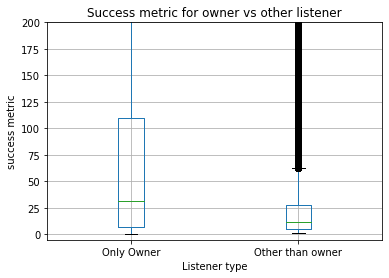

In [17]:
# owners vs others metric

user_owned_df.boxplot(column=['monthly_owner_stream30s', 'metric'])
plt.title('Success metric for owner vs other listener')
plt.xlabel("Listener type")
plt.ylabel("success metric")
plt.xticks([1,2], ['Only Owner', 'Other than owner'])
plt.ylim(-5, 200)

<b>Observation</b>

- The time spent by owner on playlist is significantly more than time spent per user by other active users.

In [18]:
# Now exclude the playlist data for playlists that were only listened by their owner

non_owner_df =  user_owned_df[user_owned_df.monthly_owner_stream30s != user_owned_df.monthly_stream30s]


In [19]:
print(non_owner_df.shape)
print(user_owned_df.shape)

(402968, 24)
(417085, 24)


In [20]:
non_owner_df.head()

,playlist_uri,owner,mau,skippers,n_tracks,n_local_tracks,n_artists,n_albums,monthly_stream30s,monthly_owner_stream30s,tokens,genre_1,genre_2,genre_3,mood_1,mood_2,mood_3,premium_mau,mau_premium_ratio,mau_exc_owner,metric,genre_count,mood_count,token_count
0,spotify:user:25d04611ade7d93b279098dd90c2dcde:...,25d04611ade7d93b279098dd90c2dcde,3,0,44,18,20,19,64,6,"[""eclectronic""]",Electronica,Alternative,Dance & House,Sensual,Excited,Brooding,1.0,0.33,2,29.00,3,3,1
1,spotify:user:a99297eb43f794a785a32258cc5320e7:...,a99297eb43f794a785a32258cc5320e7,2,0,249,0,79,81,31,26,"[""party"", ""woodside""]",Pop,Latin,Rap,Excited,Energizing,Defiant,2.0,1.00,1,5.00,3,3,2
2,spotify:user:294f08499afea11c56ddf92ab3ce6f56:...,294f08499afea11c56ddf92ab3ce6f56,5,0,313,0,271,257,682,617,"[""five"", ""hours""]",Alternative,Electronica,Pop,Excited,Aggressive,Urgent,3.0,0.60,4,16.25,3,3,2
3,spotify:user:acfea3b5d4a4b8fefa6c8605738788e8:...,acfea3b5d4a4b8fefa6c8605738788e8,2,0,109,13,90,94,49,5,"[""summertime""]",Alternative,Rap,Pop,Defiant,Excited,Energizing,2.0,1.00,1,44.00,3,3,1
4,spotify:user:46f8f6c970f7a68ec67fe69514e9b182:...,46f8f6c970f7a68ec67fe69514e9b182,2,0,414,0,284,24,15,9,"[""latino"", ""greatest"", ""hits""]",Pop,R&B,Blues,Energizing,Lively,Fiery,1.0,0.50,1,6.00,3,3,3


(0.0, 400.0)

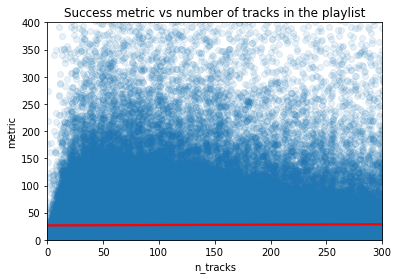

In [21]:
plt.title("Success metric vs number of tracks in the playlist")
sns.regplot(data=non_owner_df, 
            x='n_tracks', y='metric', 
            x_jitter=0.1, y_jitter=0.1,
            fit_reg=True,
            scatter_kws = {'alpha' : 0.1},
            line_kws = {'color': 'red'})

plt.xlim(0, 300)
plt.ylim(0, 400)

(0.0, 400.0)

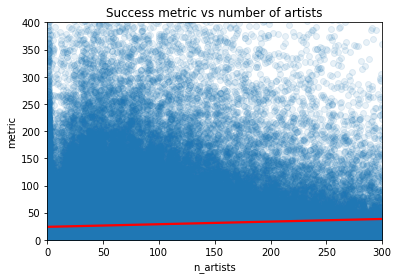

In [22]:
plt.title("Success metric vs number of artists")
sns.regplot(data=non_owner_df, 
            x='n_artists', y='metric', 
            x_jitter=0.2, y_jitter=0.2,
            fit_reg=True,
            scatter_kws = {'alpha' : 0.1},
            line_kws = {'color': 'red'})
plt.xlim(0, 300)
plt.ylim(0, 400)

(0.0, 400.0)

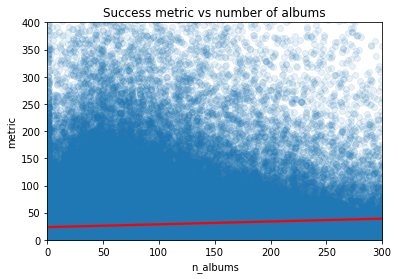

In [23]:
plt.title("Success metric vs number of albums")
sns.regplot(data=non_owner_df, 
            x='n_albums', y='metric', 
            x_jitter=0.2, y_jitter=0.2,
            fit_reg=True,
            scatter_kws = {'alpha' : 0.1},
            line_kws = {'color': 'red'})
plt.xlim(0, 300)
plt.ylim(0, 400)

(0.0, 200.0)

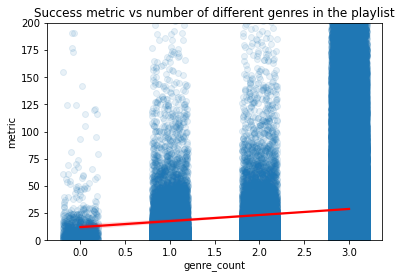

In [24]:
plt.title("Success metric vs number of different genres in the playlist")
sns.regplot(data=non_owner_df, 
            x='genre_count', y='metric', 
            x_jitter=0.2, y_jitter=0.2,
            fit_reg=True,
            scatter_kws = {'alpha' : 0.1},
            line_kws = {'color': 'red'})

plt.ylim(0, 200)

(0.0, 200.0)

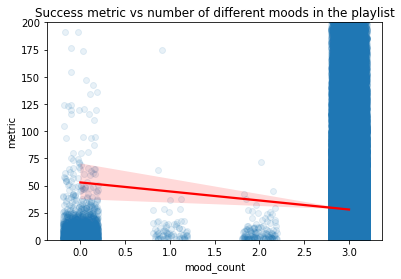

In [25]:
plt.title("Success metric vs number of different moods in the playlist")
sns.regplot(data=non_owner_df, 
            x='mood_count', y='metric', 
            x_jitter=0.2, y_jitter=0.2,
            fit_reg=True,
            scatter_kws = {'alpha' : 0.1},
            line_kws = {'color': 'red'})

plt.ylim(0, 200)

(0.0, 200.0)

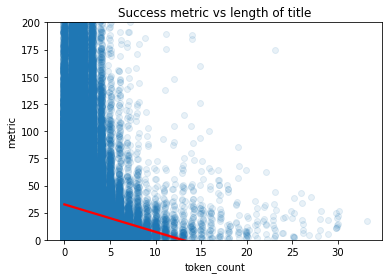

In [26]:
plt.title("Success metric vs length of title")
sns.regplot(data=non_owner_df, 
            x='token_count', y='metric', 
            x_jitter=0.2, y_jitter=0.2,
            fit_reg=True,
            scatter_kws = {'alpha' : 0.1},
            line_kws = {'color': 'red'})

plt.ylim(0, 200)

(0.0, 300.0)

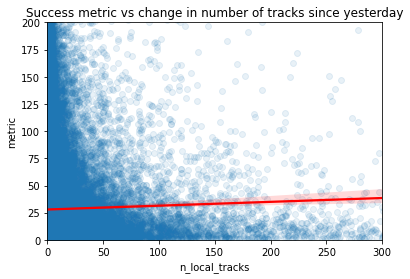

In [27]:
plt.title("Success metric vs change in number of tracks since yesterday")
sns.regplot(data=non_owner_df, 
            x='n_local_tracks', y='metric', 
            x_jitter=0.2, y_jitter=0.2,
            fit_reg=True,
            scatter_kws = {'alpha' : 0.1},
            line_kws = {'color': 'red'})

plt.ylim(0, 200)
plt.xlim(0, 300)

(0.0, 300.0)

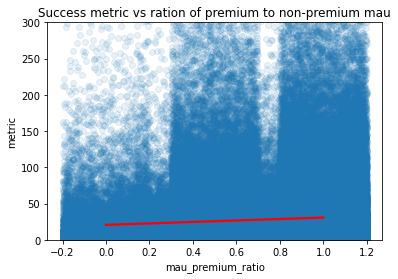

In [28]:
plt.title("Success metric vs ration of premium to non-premium mau")
sns.regplot(data=non_owner_df, 
            x='mau_premium_ratio', y='metric', 
            x_jitter=0.2, y_jitter=0.2,
            fit_reg=True,
            scatter_kws = {'alpha' : 0.1},
            line_kws = {'color': 'red'})
plt.ylim(0, 300)

## 6. Data Preprocessing

In [29]:
non_owner_df = pd.get_dummies(data=non_owner_df, columns=["genre_1",
                                                          "genre_2",
                                                          "genre_3",
                                                          "mood_1",
                                                          "mood_2",
                                                          "mood_3"])

In [30]:
# drop unnecessary columns
drop_columns_list = ["playlist_uri",
                     "owner",
                     "mau",
                     "monthly_stream30s",
                     "monthly_owner_stream30s",
                     "tokens",
                     "premium_mau",
                     "mau_exc_owner"]
non_owner_df.drop(columns= drop_columns_list, inplace=True)

In [31]:
non_owner_df.head()

,skippers,n_tracks,n_local_tracks,n_artists,n_albums,mau_premium_ratio,metric,genre_count,mood_count,token_count,genre_1_-,genre_1_Alternative,genre_1_Blues,genre_1_Children's,genre_1_Classical,genre_1_Country & Folk,genre_1_Dance & House,genre_1_Easy Listening,genre_1_Electronica,genre_1_Holiday,genre_1_Indie Rock,genre_1_Jazz,genre_1_Latin,genre_1_Metal,genre_1_New Age,genre_1_Other,genre_1_Pop,genre_1_Punk,genre_1_R&B,genre_1_Rap,genre_1_Reggae,genre_1_Religious,genre_1_Rock,genre_1_Soundtrack,genre_1_Spoken & Audio,genre_1_Traditional,genre_2_-,genre_2_Alternative,genre_2_Blues,genre_2_Children's,genre_2_Classical,genre_2_Country & Folk,genre_2_Dance & House,genre_2_Easy Listening,genre_2_Electronica,genre_2_Holiday,genre_2_Indie Rock,genre_2_Jazz,genre_2_Latin,genre_2_Metal,genre_2_New Age,genre_2_Other,genre_2_Pop,genre_2_Punk,genre_2_R&B,genre_2_Rap,genre_2_Reggae,genre_2_Religious,genre_2_Rock,genre_2_Soundtrack,genre_2_Spoken & Audio,genre_2_Traditional,genre_3_-,genre_3_Alternative,genre_3_Blues,genre_3_Children's,genre_3_Classical,genre_3_Country & Folk,genre_3_Dance & House,genre_3_Easy Listening,genre_3_Electronica,genre_3_Holiday,genre_3_Indie Rock,genre_3_Jazz,genre_3_Latin,genre_3_Metal,genre_3_New Age,genre_3_Other,genre_3_Pop,genre_3_Punk,genre_3_R&B,genre_3_Rap,genre_3_Reggae,genre_3_Religious,genre_3_Rock,genre_3_Soundtrack,genre_3_Spoken & Audio,genre_3_Traditional,mood_1_-,mood_1_Aggressive,mood_1_Brooding,mood_1_Cool,mood_1_Defiant,mood_1_Easygoing,mood_1_Empowering,mood_1_Energizing,mood_1_Excited,mood_1_Fiery,mood_1_Gritty,mood_1_Lively,mood_1_Melancholy,mood_1_Other,mood_1_Peaceful,mood_1_Romantic,mood_1_Rowdy,mood_1_Sensual,mood_1_Sentimental,mood_1_Serious,mood_1_Somber,mood_1_Sophisticated,mood_1_Stirring,mood_1_Tender,mood_1_Upbeat,mood_1_Urgent,mood_1_Yearning,mood_2_-,mood_2_Aggressive,mood_2_Brooding,mood_2_Cool,mood_2_Defiant,mood_2_Easygoing,mood_2_Empowering,mood_2_Energizing,mood_2_Excited,mood_2_Fiery,mood_2_Gritty,mood_2_Lively,mood_2_Melancholy,mood_2_Other,mood_2_Peaceful,mood_2_Romantic,mood_2_Rowdy,mood_2_Sensual,mood_2_Sentimental,mood_2_Serious,mood_2_Somber,mood_2_Sophisticated,mood_2_Stirring,mood_2_Tender,mood_2_Upbeat,mood_2_Urgent,mood_2_Yearning,mood_3_-,mood_3_Aggressive,mood_3_Brooding,mood_3_Cool,mood_3_Defiant,mood_3_Easygoing,mood_3_Empowering,mood_3_Energizing,mood_3_Excited,mood_3_Fiery,mood_3_Gritty,mood_3_Lively,mood_3_Melancholy,mood_3_Other,mood_3_Peaceful,mood_3_Romantic,mood_3_Rowdy,mood_3_Sensual,mood_3_Sentimental,mood_3_Serious,mood_3_Somber,mood_3_Sophisticated,mood_3_Stirring,mood_3_Tender,mood_3_Upbeat,mood_3_Urgent,mood_3_Yearning
0,0,44,18,20,19,0.33,29.00,3,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,249,0,79,81,1.00,5.00,3,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,313,0,271,257,0.60,16.25,3,3,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,109,13,90,94,1.00,44.00,3,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [32]:
# create train and test data set

X = non_owner_df.drop(columns=["metric"])
y = non_owner_df.loc[:,"metric"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 20)

## 7. Model Building

In [33]:
# rf_pipeline = Pipeline([
#     ('scl', MinMaxScaler()),
#     ('reg', RandomForestRegressor(verbose=2,
#                                   n_jobs=-1))
# ])

# pipe_parameters = {
#     "reg__n_estimators": [100, 300],
#     "reg__max_depth": [50, 100]
# }

# cv = GridSearchCV(rf_pipeline,
#                   param_grid=pipe_parameters,
#                   scoring= 'r2',
#                   cv = 5,
#                   verbose=10,
#                   n_jobs= -1)

In [34]:
gb_model = GradientBoostingRegressor(n_estimators=30,
                                     max_depth=10,
                                     max_features='sqrt',
                                     learning_rate=0.01,
                                     verbose=100)

gb_model.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1        6440.9552           54.22s
         2        6426.5539           46.86s
         3        6413.2185           48.59s
         4        6403.1425           43.11s
         5        6381.8764           42.48s
         6        6372.7488           38.65s
         7        6349.5709           37.67s
         8        6330.8451           37.75s
         9        6323.0025           35.82s
        10        6306.4149           34.57s
        11        6290.4242           33.13s
        12        6280.0968           30.92s
        13        6266.6507           29.07s
        14        6252.8712           27.19s
        15        6234.2297           25.43s
        16        6223.9246           24.00s
        17        6216.7212           22.31s
        18        6199.8026           20.57s
        19        6187.4946           18.94s
        20        6165.6808           17.46s
        21        6158.6771           15.49s
        2

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, max_features='sqrt',
                          n_estimators=30, verbose=100)

In [35]:
r2_train = r2_score(y_pred=gb_model.predict(X_train), y_true=y_train)
r2_test = r2_score(y_pred=gb_model.predict(X_test), y_true=y_test)

print(f"The R^2 for training data is {r2_train} and for test data is {r2_test}")

The R^2 for training data is 0.06394995569591155 and for test data is 0.019265404942177877


In [36]:
pd.DataFrame({'columns': X.columns,
              'feature_importance': gb_model.feature_importances_}).sort_values(by='feature_importance',
                                                                                ascending=False).head()

,columns,feature_importance
1,n_tracks,0.227006
4,n_albums,0.206903
3,n_artists,0.091950
8,token_count,0.048701
5,mau_premium_ratio,0.046642
